# 1.Importación de las librerías

In [1]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy


# 2. Importación y representación del conjunto de datos

In [2]:
# Importamos el conjunto de datos
datos = pd.read_csv("C:/Users/Polex/ML/TFM/input/captura_trafico_UDP.csv") # sustituir esta ruta por la ubicación del dataset en nuestro sistema
print(datos.head())

   No.       Time        Source    Destination Protocol  Length  \
0   17   6.077358  192.168.1.40  192.168.1.255      UDP    1462   
1   43  12.634470  192.168.1.40   80.58.61.254      DNS      85   
2   44  12.634470  192.168.1.40   80.58.61.254      DNS      85   
3   45  12.634608  192.168.1.40   80.58.61.254      DNS      77   
4   46  12.634787  192.168.1.40   80.58.61.254      DNS      77   

                                                Info  
0                               889  >  889 Len=1420  
1  Standard query 0x2f14 A api.flightproxy.skype.com  
2  Standard query 0x77df AAAA api.flightproxy.sky...  
3          Standard query 0x4f9b A api3.cc.skype.com  
4       Standard query 0x506f AAAA api3.cc.skype.com  


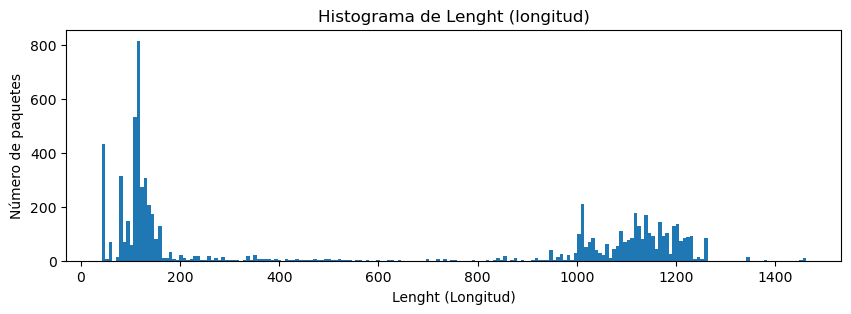

In [3]:
# Asignamos los datos a las variables e
# Imprimimos una representación gráfica del conjunto de datos en forma de histograma
feature1 = datos['Length'].values
feature2 = [10] * len(feature1)

plt.rcParams['figure.figsize'] = (10,3)
plt.hist(feature1 ,200) 
plt.title("Histograma de Lenght (longitud)" )
plt.xlabel('Lenght (Longitud)')
plt.ylabel('Número de paquetes')
plt.show()

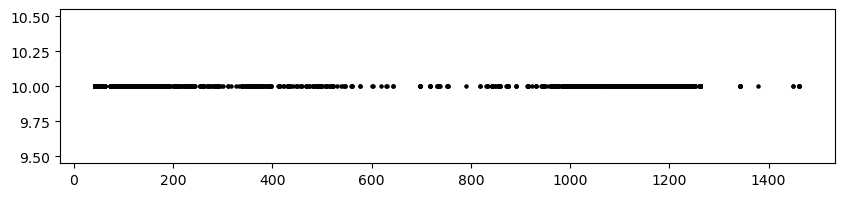

In [4]:
# Imprimimos una representación gráfica del conjunto de datos en el eje horizontal x

plt.rcParams['figure.figsize'] = (10, 2)
plt.scatter(feature1, feature2, c='black', s=5)
plt.show()

# 3.Inicialización de los centroides

In [5]:
# Inicializamos los centroides de los clústeres
K = 4 # número de centroides de los clústeres que se van a emplear

In [6]:
# Inicializamos las coordenadas Y y X para cada centroides de clúster
C_x = np.random.randint(0, np.max(feature1), size=K)
C_y = [10] * K

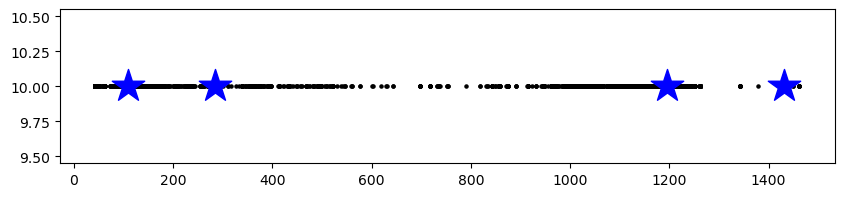

In [7]:
# Imprimimos una representación gráfica de los clústeres

plt.scatter(feature1, feature2, c='black', s=5)
plt.scatter(C_x, C_y, marker='*', c='b', s=600)
plt.show()

# 4. Agrupación de los datos

In [8]:
# Definimos una función para calcular la distancia de los puntos a los centroides
def distancia(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [9]:
# Agrupamos los datos en matrices
X = np.array(list(zip(feature1, feature2)))
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)


In [10]:
# Variable para almacenar el valor de los centroides cuando se actualicen
C_anterior = np.zeros(C.shape)

# Etiquetas de los clusters
clusters = np.zeros(len(X))

#Calculamos la distancia entre los nuevos centroides y los anteriores
dist = distancia(C, C_anterior, None)

while dist != 0:
        # Se le asigna el valor de distancia al cluster más cercano
        for i in range(len(X)):
            distancias = distancia(X[i], C)
            # Se elge la menor de las distancias
            c_min = np.argmin(distancias)
            clusters[i] = c_min
                
        # Asignamos los nuevos valores a los centroides
        for i in range(K):
            datos_asignados = [X[j] for j in range(len(X)) if clusters[j] == i]
            # Calulamos la media de los elementos asignados
            C[i] = np.mean(datos_asignados, axis=0)
            # Guardamos los valores anteriores
            C_anterior = deepcopy(C)
            # Comprobamos si la posición de los centroides ha variado
            dist = distancia(C, C_anterior, None)                            

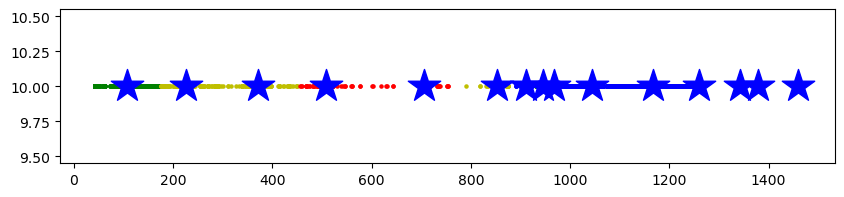

In [12]:
  # Representación gráfica de la asignación
Colores = ['y', 'r', 'g', 'b']
fig, ax = plt.subplots()

for i in range(K):
    datos_asignados = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(datos_asignados[:,0], datos_asignados[:,1], s=5, c=Colores[i])
    
ax.scatter(C[:,0], C[:,1], marker='*', s=600, c='b')

#plt.axis([0, 400, 9.5, 10.5])  # Descomentar esta linea de c
plt.show()
